<a href="https://colab.research.google.com/github/sharan-88/sms_spam_detection/blob/main/sms_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sms-spam-collection-dataset


In [8]:
import os

In [9]:
dir=[]
for i in os.listdir(path):
    dir.append(i)
print(dir)

['spam.csv']


In [10]:
direct_path = os.path.join(path,dir[0])
print(direct_path)

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [11]:
df  = pd.read_csv(direct_path,encoding='latin-1')

In [12]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


1. data cleaning
2.EDA
3.Text preprocessing
4.Model building
5.Model Evaluation
6.improvement
7.website
8.deployement

### step 01 : DATA CLEANING

In [13]:
df.shape

(5572, 5)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [15]:
df.dtypes

,0
v1,object
v2,object
Unnamed: 2,object
Unnamed: 3,object
Unnamed: 4,object


In [16]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [17]:
df_droped = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [18]:
df_droped.columns

Index(['v1', 'v2'], dtype='object')

In [19]:
df_droped.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [20]:
df_droped

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_droped['target'] = encoder.fit_transform(df_droped['target'])

In [22]:
df_droped.isnull().sum()

,0
target,0
text,0


In [23]:
df_droped.duplicated().sum()

df = df_droped.drop_duplicates(keep='first')
df.shape

(5169, 2)

In [24]:
# total number of spams and ham in data set
df['target'].value_counts()

,count
target,
0,4516
1,653


In [25]:
import mathplotlib.pyplot as plt
import seaborn as sns

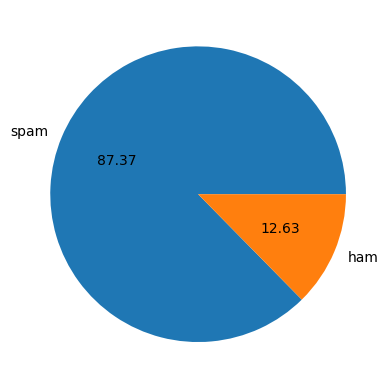

In [26]:
labels=["spam","ham"]
diagram01 = plt.pie(df['target'].value_counts(),labels=labels,autopct="%0.2f")
plt.show(diagram01)

Data is imbalanced

In [27]:
import nltk
!pip install nltk

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

to count the number of characters in a message

In [31]:
df["number_of_character"] = df["text"].apply(lambda x : len(x))

/tmp/ipython-input-2457602808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["number_of_character"] = df["text"].apply(lambda x : len(x))


In [32]:
df.columns

Index(['target', 'text', 'number_of_character'], dtype='object')

number of words

In [35]:
def count_words(x):
  x = x.strip()
  data =x.split(" ")
  return len(data)


In [36]:
count_words("hello we are here to help you")

7

In [45]:
# df["number_of_words"] = df["text"].apply(lambda x : count_words(x))
df["number_of_words"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

/tmp/ipython-input-554069406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["number_of_words"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))


In [46]:
df["number_of_sentence"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

/tmp/ipython-input-2605795736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["number_of_sentence"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))


In [53]:
df.head(4)
df.columns
df[['number_of_character', 'number_of_words',
       'number_of_sentence']].describe()

,number_of_character,number_of_words,number_of_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [57]:
# spam data info
df[df.target == 0][['number_of_character', 'number_of_words',
       'number_of_sentence']].describe()

,number_of_character,number_of_words,number_of_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [58]:
# ham data info
df[df.target == 1][['number_of_character', 'number_of_words',
       'number_of_sentence']].describe()

,number_of_character,number_of_words,number_of_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000
